In [1]:
import os
import random
from tqdm import tqdm

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

from src.model import Model
from src import utils
from src.pytorch_utils import utils as ptu
from config import cfg
import src.data_loader as dl

%load_ext autoreload
%autoreload 2

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
model_epoch = 'best'
if cfg.load is not None and os.path.exists(os.path.join(cfg.models_dir, cfg.version, ptu.naming_scheme(cfg.version, epoch=model_epoch)) + '.pth'):
    print(f'Loads {cfg.version}')
    checkpoint = ptu.load_model(device, version=cfg.version, models_dir=cfg.models_dir, epoch=model_epoch)
    if cfg.prints == 'display':
        display(checkpoint.log.sort_index(ascending=False).head(20))
    elif cfg.prints == 'print':
        print(checkpoint.log.sort_index(ascending=False).head(20))
else:
    model = Model(backbone=cfg.backbone, num_classes=cfg.num_classes)
    model.to(device)
    
    if cfg.optimizer == 'sgd':
        optimizer = torch.optim.SGD(model.model.fc.parameters(),
                                    lr=cfg.lr,
                                    momentum=cfg.optimizer_momentum,
                                    weight_decay=cfg.wd)
    else:
        optimizer = torch.optim.Adam(model.model.fc.parameters(),
                                    lr=cfg.lr,
                                    weight_decay=cfg.wd)
    
    criterion = nn.CrossEntropyLoss().to(device)
    
    lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,
                                                              T_max=cfg.epochs,
                                                              eta_min=cfg.min_lr)
    
    checkpoint = utils.Checkpoint(version=cfg.version,
                                  model=model,
                                  optimizer=optimizer,
                                  lr_scheduler=lr_scheduler,
                                  criterion=criterion,
                                  score=utils.accuracy_score,
                                  models_dir=cfg.models_dir,
                                  best_policy=cfg.best_policy,
                                  save=cfg.save,
                                 )

Loads resnet50_sgd_bs64


,train_time,timestamp,train_loss,val_loss,train_score,val_score,batch_size,best,dampening,initial_lr,lr,momentum,nesterov,weight_decay
538,0.903285,05:54:14 26-08-2021,1.350093,1.334692,0.545673,0.555990,64,True,0.0,0.01,0.000270,0.9,0.0,0.0
537,0.893099,05:53:16 26-08-2021,1.363535,1.354711,0.543369,0.545974,64,False,0.0,0.01,0.000278,0.9,0.0,0.0
536,0.905701,05:52:20 26-08-2021,1.361006,1.345835,0.539663,0.547977,64,False,0.0,0.01,0.000287,0.9,0.0,0.0
535,0.893115,05:51:22 26-08-2021,1.353576,1.351293,0.541567,0.547676,64,False,0.0,0.01,0.000296,0.9,0.0,0.0
534,0.904693,05:50:25 26-08-2021,1.332627,1.327337,0.547977,0.553085,64,False,0.0,0.01,0.000305,0.9,0.0,0.0
533,0.893345,05:49:27 26-08-2021,1.332664,1.318423,0.548177,0.552384,64,False,0.0,0.01,0.000314,0.9,0.0,0.0
532,0.890562,05:48:31 26-08-2021,1.390491,1.388798,0.541767,0.546575,64,False,0.0,0.01,0.000323,0.9,0.0,0.0
531,0.905504,05:47:34 26-08-2021,1.364834,1.354946,0.544972,0.551282,64,False,0.0,0.01,0.000332,0.9,0.0,0.0
530,0.890888,05:46:36 26-08-2021,1.353317,1.340069,0.545072,0.550381,64,False,0.0,0.01,0.000342,0.9,0.0,0.0
529,0.900397,05:45:40 26-08-2021,1.358205,1.352540,0.543570,0.547376,64,False,0.0,0.01,0.000351,0.9,0.0,0.0


In [4]:
# train_loader, train_eval_loader = dl.train_eval_loaders_cifar10(data_dir=cfg.data_dir, batch_size=cfg.bs)
# test_loader = dl.test_loader(data_dir=cfg.data_dir, batch_size=cfg.bs)

In [5]:
# checkpoint.train(train_loader=train_loader,
#                  train_eval_loader=train_eval_loader,
#                  val_loader=test_loader,
#                  train_epochs=int(max(0, cfg.epochs - checkpoint.get_log())),
#                  optimizer_params=cfg.optimizer_params,
#                  prints=cfg.prints,
#                  epochs_save=cfg.epochs_save,
#                  epochs_evaluate_train=cfg.epochs_evaluate_train,
#                  epochs_evaluate_validation=cfg.epochs_evaluate_validation,
#                  max_iterations_train=cfg.max_iterations,
#                  max_iterations_val=cfg.max_iterations,
#                  device=device,
#                  tqdm_bar=cfg.tqdm_bar,
#                  save=cfg.save,
#                  save_log=cfg.save_log,
#                 )

In [6]:
df = pd.DataFrame(columns=['augment', 'class', 'angle', 'loss', 'score'])

In [7]:
# all classes
for angle in range(0, 91, 10):
    print(f'Angle {angle}')
    test_loader = dl.test_loader(data_dir=cfg.data_dir,
                                 batch_size=cfg.bs,
                                 augment=True,
                                 angles=[angle])
    loss, score, results = checkpoint.evaluate(loader=test_loader,
                                               device=device,
                                               tqdm_bar=True)
    df = df.append({'augment': 'rotation', 'class': 'all', 'angle': angle, 'loss': loss, 'score': score},
                   ignore_index=True)

Angle 0
Files already downloaded and verified


epoch=538: 100%|██████████| 156/156 [00:04<00:00, 36.56it/s, loss=1.4, avg_loss=1.33, score=0.531] 


Angle 10
Files already downloaded and verified


epoch=538: 100%|██████████| 156/156 [00:04<00:00, 36.67it/s, loss=1.85, avg_loss=1.86, score=0.453]


Angle 20
Files already downloaded and verified


epoch=538: 100%|██████████| 156/156 [00:04<00:00, 35.59it/s, loss=2.45, avg_loss=2.33, score=0.219]


Angle 30
Files already downloaded and verified


epoch=538: 100%|██████████| 156/156 [00:04<00:00, 36.57it/s, loss=2.57, avg_loss=2.5, score=0.234]


Angle 40
Files already downloaded and verified


epoch=538: 100%|██████████| 156/156 [00:04<00:00, 34.87it/s, loss=2.57, avg_loss=2.77, score=0.266]


Angle 50
Files already downloaded and verified


epoch=538: 100%|██████████| 156/156 [00:04<00:00, 34.76it/s, loss=3.12, avg_loss=2.89, score=0.141]


Angle 60
Files already downloaded and verified


epoch=538: 100%|██████████| 156/156 [00:04<00:00, 35.93it/s, loss=2.98, avg_loss=2.79, score=0.156]


Angle 70
Files already downloaded and verified


epoch=538: 100%|██████████| 156/156 [00:04<00:00, 36.24it/s, loss=3.05, avg_loss=2.72, score=0.156]


Angle 80
Files already downloaded and verified


epoch=538: 100%|██████████| 156/156 [00:04<00:00, 36.13it/s, loss=2.4, avg_loss=2.34, score=0.234] 


Angle 90
Files already downloaded and verified


epoch=538: 100%|██████████| 156/156 [00:04<00:00, 36.42it/s, loss=1.87, avg_loss=2.04, score=0.344]


In [8]:
df

,augment,class,angle,loss,score
0,rotation,all,0,1.334692,0.555990
1,rotation,all,10,1.864001,0.386518
2,rotation,all,20,2.327150,0.265224
3,rotation,all,30,2.501850,0.244091
4,rotation,all,40,2.773945,0.212039
5,rotation,all,50,2.889938,0.191006
6,rotation,all,60,2.788504,0.204728
7,rotation,all,70,2.717652,0.214643
8,rotation,all,80,2.338355,0.267127
9,rotation,all,90,2.038612,0.359175


In [9]:
# by class by angle classes
for class_name in utils.classDict.keys():
    for angle in range(0, 91, 10):
        print(f'Class {class_name}, Angle {angle}')
        test_loader = dl.test_loader(data_dir=cfg.data_dir,
                                     batch_size=cfg.bs,
                                     augment=True,
                                     angles=[angle],
                                     class_name=class_name
                                    )
        loss, score, results = checkpoint.evaluate(loader=test_loader,
                                                   device=device,
                                                   tqdm_bar=True)
        df = df.append({'augment': 'rotation', 'class': class_name, 'angle': angle, 'loss': loss, 'score': score},
                       ignore_index=True)

Class plane, Angle 0
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 20.34it/s, loss=1.34, avg_loss=1.23, score=0.578]


Class plane, Angle 10
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.23it/s, loss=1.12, avg_loss=1.47, score=0.641]


Class plane, Angle 20
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.72it/s, loss=2.05, avg_loss=2.46, score=0.344]


Class plane, Angle 30
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.60it/s, loss=1.77, avg_loss=2.19, score=0.406]


Class plane, Angle 40
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.23it/s, loss=1.84, avg_loss=2.24, score=0.375]


Class plane, Angle 50
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.35it/s, loss=2.03, avg_loss=2.42, score=0.344]


Class plane, Angle 60
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.48it/s, loss=2.16, avg_loss=2.67, score=0.328]


Class plane, Angle 70
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.18it/s, loss=2.91, avg_loss=3, score=0.297]  


Class plane, Angle 80
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.16it/s, loss=2.05, avg_loss=2.37, score=0.422]


Class plane, Angle 90
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.93it/s, loss=2.04, avg_loss=2.03, score=0.344]


Class car, Angle 0
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.60it/s, loss=4.55, avg_loss=4.74, score=0.0156]


Class car, Angle 10
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.00it/s, loss=4.13, avg_loss=4.07, score=0.0938]


Class car, Angle 20
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.50it/s, loss=4.61, avg_loss=4.76, score=0.0625]


Class car, Angle 30
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.54it/s, loss=4.03, avg_loss=4.21, score=0.0938]


Class car, Angle 40
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.83it/s, loss=3.85, avg_loss=3.97, score=0.0781]


Class car, Angle 50
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.24it/s, loss=3.93, avg_loss=4.09, score=0.0625]


Class car, Angle 60
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.58it/s, loss=4.11, avg_loss=4.35, score=0.0312]


Class car, Angle 70
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.28it/s, loss=4.67, avg_loss=4.89, score=0.0781]


Class car, Angle 80
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.41it/s, loss=4.78, avg_loss=4.97, score=0.0469]


Class car, Angle 90
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.12it/s, loss=4.61, avg_loss=4.82, score=0.0156]


Class bird, Angle 0
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.77it/s, loss=4.64, avg_loss=4.19, score=0.0938]


Class bird, Angle 10
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.87it/s, loss=3.64, avg_loss=3.41, score=0.0625]


Class bird, Angle 20
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.44it/s, loss=4.1, avg_loss=3.79, score=0.109] 


Class bird, Angle 30
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.26it/s, loss=4.18, avg_loss=3.79, score=0.0781]


Class bird, Angle 40
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.33it/s, loss=4.46, avg_loss=4.01, score=0.0312]


Class bird, Angle 50
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.98it/s, loss=4.6, avg_loss=4.17, score=0.0625]


Class bird, Angle 60
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.76it/s, loss=4.25, avg_loss=3.98, score=0.0625]


Class bird, Angle 70
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.22it/s, loss=4.3, avg_loss=4.13, score=0.0938] 


Class bird, Angle 80
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.32it/s, loss=4.19, avg_loss=4.07, score=0.109]


Class bird, Angle 90
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.72it/s, loss=4.28, avg_loss=3.96, score=0.0781]


Class cat, Angle 0
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 20.12it/s, loss=5.51, avg_loss=5.25, score=0]    


Class cat, Angle 10
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.73it/s, loss=4.7, avg_loss=4.48, score=0.0781]


Class cat, Angle 20
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.88it/s, loss=4.18, avg_loss=4.45, score=0.0469]


Class cat, Angle 30
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.85it/s, loss=3.95, avg_loss=4.25, score=0.0938]


Class cat, Angle 40
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.72it/s, loss=3.87, avg_loss=4.17, score=0.0469]


Class cat, Angle 50
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.18it/s, loss=4.11, avg_loss=4.28, score=0]     


Class cat, Angle 60
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.88it/s, loss=4.68, avg_loss=4.47, score=0.0312]


Class cat, Angle 70
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.98it/s, loss=4.55, avg_loss=4.66, score=0]    


Class cat, Angle 80
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.29it/s, loss=4.78, avg_loss=5.03, score=0.0156]


Class cat, Angle 90
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.67it/s, loss=5.09, avg_loss=4.78, score=0.0156]


Class deer, Angle 0
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.94it/s, loss=5.56, avg_loss=4.99, score=0.0312]


Class deer, Angle 10
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.13it/s, loss=4.55, avg_loss=4.66, score=0.0469]


Class deer, Angle 20
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.91it/s, loss=4.5, avg_loss=4.56, score=0.0312] 


Class deer, Angle 30
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.31it/s, loss=4.34, avg_loss=4.34, score=0.0312]


Class deer, Angle 40
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.98it/s, loss=4.57, avg_loss=4.38, score=0]     


Class deer, Angle 50
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.39it/s, loss=4.65, avg_loss=4.46, score=0.0156]


Class deer, Angle 60
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.28it/s, loss=4.59, avg_loss=4.56, score=0.0156]


Class deer, Angle 70
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.85it/s, loss=4.87, avg_loss=4.68, score=0]    


Class deer, Angle 80
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.19it/s, loss=5.41, avg_loss=5.21, score=0.0156]


Class deer, Angle 90
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.84it/s, loss=4.66, avg_loss=4.79, score=0.0312]


Class dog, Angle 0
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.58it/s, loss=5.82, avg_loss=6.02, score=0]     


Class dog, Angle 10
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.15it/s, loss=4.85, avg_loss=5.04, score=0.0469]


Class dog, Angle 20
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.61it/s, loss=4.44, avg_loss=4.74, score=0.0625]


Class dog, Angle 30
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.15it/s, loss=4.12, avg_loss=4.38, score=0.0625]


Class dog, Angle 40
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.51it/s, loss=4.18, avg_loss=4.31, score=0.0625]


Class dog, Angle 50
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.23it/s, loss=4.6, avg_loss=4.36, score=0.0312] 


Class dog, Angle 60
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.02it/s, loss=4.37, avg_loss=4.5, score=0.0469] 


Class dog, Angle 70
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.52it/s, loss=4.68, avg_loss=4.72, score=0.0469]


Class dog, Angle 80
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.36it/s, loss=5.42, avg_loss=5.34, score=0]    


Class dog, Angle 90
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.52it/s, loss=5.14, avg_loss=5.16, score=0.0469]


Class frog, Angle 0
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.85it/s, loss=5.78, avg_loss=5.99, score=0.0469]


Class frog, Angle 10
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.10it/s, loss=5.43, avg_loss=5.44, score=0]     


Class frog, Angle 20
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.79it/s, loss=5.72, avg_loss=5.67, score=0.0469]


Class frog, Angle 30
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.33it/s, loss=5.07, avg_loss=5.39, score=0.0156]


Class frog, Angle 40
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.04it/s, loss=5.1, avg_loss=5.33, score=0.0156]


Class frog, Angle 50
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.10it/s, loss=5.08, avg_loss=5.38, score=0.0156]


Class frog, Angle 60
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.20it/s, loss=5.23, avg_loss=5.53, score=0.0156]


Class frog, Angle 70
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.44it/s, loss=5.73, avg_loss=5.73, score=0.0312]


Class frog, Angle 80
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.57it/s, loss=6.25, avg_loss=6.29, score=0]    


Class frog, Angle 90
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.41it/s, loss=6.09, avg_loss=6.01, score=0.0312]


Class horse, Angle 0
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.73it/s, loss=5.35, avg_loss=5.03, score=0.0156]


Class horse, Angle 10
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.73it/s, loss=4.62, avg_loss=4.5, score=0.0469] 


Class horse, Angle 20
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 17.90it/s, loss=4.28, avg_loss=4.52, score=0.0625]


Class horse, Angle 30
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 17.91it/s, loss=3.8, avg_loss=4.11, score=0.0625] 


Class horse, Angle 40
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 17.66it/s, loss=3.93, avg_loss=4.07, score=0.0625]


Class horse, Angle 50
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.50it/s, loss=4.11, avg_loss=4.26, score=0.0312]


Class horse, Angle 60
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.51it/s, loss=4.69, avg_loss=4.68, score=0]     


Class horse, Angle 70
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.65it/s, loss=4.81, avg_loss=5.01, score=0.0156]


Class horse, Angle 80
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.30it/s, loss=4.72, avg_loss=4.84, score=0.0469]


Class horse, Angle 90
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 17.77it/s, loss=4.36, avg_loss=4.26, score=0.0469]


Class ship, Angle 0
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.02it/s, loss=2.82, avg_loss=2.71, score=0.0938]


Class ship, Angle 10
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.38it/s, loss=2.46, avg_loss=2.06, score=0.266]


Class ship, Angle 20
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.31it/s, loss=3.06, avg_loss=2.94, score=0.156]


Class ship, Angle 30
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 17.29it/s, loss=2.9, avg_loss=2.72, score=0.188]


Class ship, Angle 40
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.64it/s, loss=2.78, avg_loss=2.65, score=0.0938]


Class ship, Angle 50
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.10it/s, loss=3.05, avg_loss=2.85, score=0.0781]


Class ship, Angle 60
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.38it/s, loss=3.21, avg_loss=3.05, score=0.0938]


Class ship, Angle 70
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.05it/s, loss=3.34, avg_loss=3.46, score=0.141]


Class ship, Angle 80
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.15it/s, loss=3.23, avg_loss=3.15, score=0.125]


Class ship, Angle 90
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.48it/s, loss=3.36, avg_loss=2.95, score=0.172]


Class truck, Angle 0
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.25it/s, loss=4.39, avg_loss=4.44, score=0.0625]


Class truck, Angle 10
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.11it/s, loss=3.83, avg_loss=3.9, score=0.0938] 


Class truck, Angle 20
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.49it/s, loss=4.53, avg_loss=4.54, score=0.109]


Class truck, Angle 30
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 19.05it/s, loss=3.73, avg_loss=3.7, score=0.172] 


Class truck, Angle 40
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.27it/s, loss=3.64, avg_loss=3.51, score=0.141] 


Class truck, Angle 50
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.78it/s, loss=3.67, avg_loss=3.7, score=0.125] 


Class truck, Angle 60
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.26it/s, loss=4.05, avg_loss=4.24, score=0.0781]


Class truck, Angle 70
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.71it/s, loss=4.43, avg_loss=4.63, score=0.0781]


Class truck, Angle 80
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.87it/s, loss=4.35, avg_loss=4.59, score=0.0156]


Class truck, Angle 90
Files already downloaded and verified


epoch=538: 100%|██████████| 15/15 [00:00<00:00, 18.47it/s, loss=4.32, avg_loss=4.39, score=0.0469]


In [10]:
df

,augment,class,angle,loss,score
0,rotation,all,0,1.334692,0.555990
1,rotation,all,10,1.864001,0.386518
2,rotation,all,20,2.327150,0.265224
3,rotation,all,30,2.501850,0.244091
4,rotation,all,40,2.773945,0.212039
...,...,...,...,...,...
105,rotation,truck,50,3.702032,0.103125
106,rotation,truck,60,4.244040,0.063542
107,rotation,truck,70,4.630176,0.040625
108,rotation,truck,80,4.593274,0.038542


In [11]:
df.to_csv('log.csv', index=False)

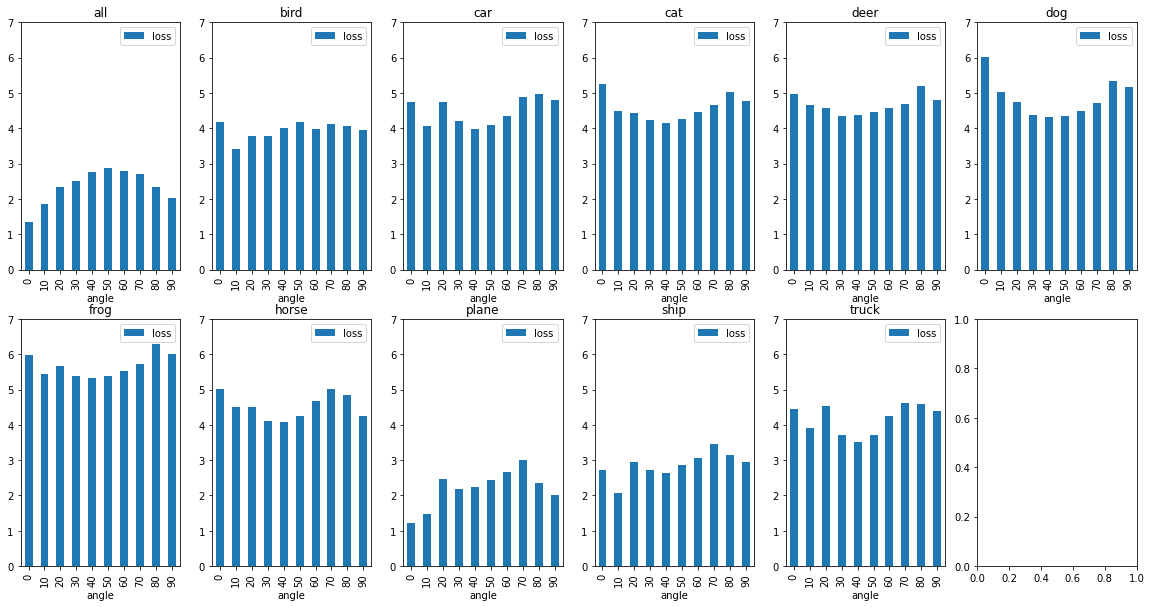

In [41]:
fig, axes = plt.subplots(figsize=(20,10),
                         nrows=2, ncols=6)
for (val, group), ax in zip(df.groupby('class'), axes.flatten()):
    group.plot(x='angle', y='loss', kind='bar', ax=ax, title=val, ylim=(0, 7))

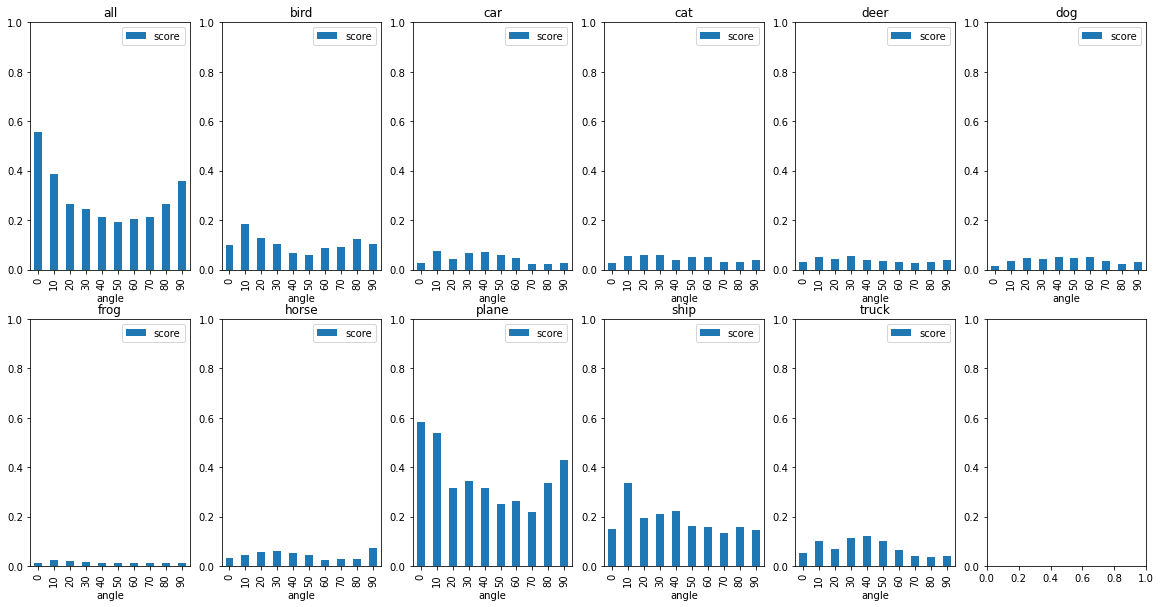

In [44]:
# df.groupby('class').plot.bar(x='angle', y='score', ylim=(0, 1), subplots=True)
fig, axes = plt.subplots(figsize=(20,10),
                         nrows=2, ncols=6)
for (val, group), ax in zip(df.groupby('class'), axes.flatten()):
    group.plot(x='angle', y='score', kind='bar', ax=ax, title=val, ylim=(0, 1))